<h1 align="center"><font size="10">Predicting Loan-Status</font></h1>

> In this notebook we try to apply various classification algorithms that may help us predict the loan-status.

> Then, we are going to find the best one for this specific dataset by accuracy evaluation methods.


## Importing The Necessary **Libraries**

In [ ]:
# Numpy is for numerical calculations and array manipulations
import numpy as np

# Pandas is for dataFrame Manipulation
import pandas as pd

# Pandas_Profiling for exploring the data interactively
from pandas_profiling import ProfileReport

# Essential Data Visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Essential Machine Learning packages
import sklearn
import scipy
import statsmodels.api as sm

## Loading The Data **Raw Data**

In [ ]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-06-13 01:50:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-06-13 01:50:25 (190 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [ ]:
# Reading the data into a DataFrame
Data = pd.read_csv('loan_train.csv')

# Making a copy of the data 
df    = Data.copy()

In [ ]:
# Viewing the top 5 rows  
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [ ]:
# Viewing the shape of the dataframe  
df.shape

(346, 10)

## Data **Cleansning** & **Preprocessing**

### The **structure** of the dataset.

In [ ]:
# Viewing information about the dataframe
df.info()

In [ ]:
# Brief summary statistics of both numerical and categorical columns 
df.describe(include='all')

### **About** dataset

- This dataset is about past loans. The data set includes details of 346 customers whose loans are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off or in collection                                           |
| Principal      | Basic principal loan amount                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant   

### Unifying columns **naming convention**

In [ ]:
# Renaming the columns to be in lowercase separated by '_' instead of spaces
df.rename( columns= lambda x : x.strip().lower().replace(' ','_'), inplace = True);

# Viewing the top 5 rows
df.head()

,unnamed:_0,unnamed:_0.1,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


### **Dropping** unneeded columns.

In [ ]:
df.columns

Index(['unnamed:_0', 'unnamed:_0.1', 'loan_status', 'principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'gender'],
      dtype='object')

In [ ]:
# creating a list holding the columns to be dropped
cols = ['unnamed:_0', 'unnamed:_0.1', 'due_date']

In [ ]:
# Dropping the columns
df.drop( cols, axis=1, inplace= True )

In [ ]:
# Viewing the top 5 rows of the new data after dropping the columns
df.head(5)

,loan_status,principal,terms,effective_date,age,education,gender
0,PAIDOFF,1000,30,9/8/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,29,college,male


### Modifying Columns dtypes for the sake of **relevance**.

In [ ]:
# Getting columns & its data types
df.dtypes

loan_status       object
principal          int64
terms              int64
effective_date    object
age                int64
education         object
gender            object
dtype: object

> Converting the string date into **Datetime**

In [ ]:
# Converting a string column into datetime 
df['effective_date'] = pd.to_datetime( df['effective_date'] )

In [ ]:
# Extracting the day of the week from the date column
df['day_of_week'] = df['effective_date'].dt.dayofweek

In [ ]:
# Creating a column to tell either we're in a weekend or not
df['weekend'] = df['day_of_week'].apply(lambda x: 1 if (x>3)  else 0)

In [ ]:
# Viewing the top 5 rows of the new data after dropping the columns
df.head(5)

,loan_status,principal,terms,effective_date,age,education,gender,day_of_week,weekend
0,PAIDOFF,1000,30,2016-09-08,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,29,college,male,4,1


In [ ]:
# Dropping the columns
df.drop( ['day_of_week', 'effective_date'], axis=1, inplace= True )

# Viewing the top 5 rows of the new data after dropping the columns
df.head(5)

,loan_status,principal,terms,age,education,gender,weekend
0,PAIDOFF,1000,30,45,High School or Below,male,0
1,PAIDOFF,1000,30,33,Bechalor,female,0
2,PAIDOFF,1000,15,27,college,male,0
3,PAIDOFF,1000,30,28,college,female,1
4,PAIDOFF,1000,30,29,college,male,1


### Checking data **accuracy,consistency & validity**.

In [ ]:
# Viewing the distinct values and their corresponding count for categorical columns
from pandas.api.types import is_numeric_dtype
for col in df.columns:
    if (is_numeric_dtype(df[col]) == False):
      print(f'({col}):\n{df[col].value_counts()}\n\n')

(loan_status):
PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64


(education):
High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64


(gender):
male      294
female     52
Name: gender, dtype: int64




> It seems that all the classes within the categorical variables are **unique** and **consistent**.

### Checking for nulls for **completeness**.


In [ ]:
# Detecting null values in our dataset:
df.isnull().sum()

loan_status    0
principal      0
terms          0
age            0
education      0
gender         0
weekend        0
dtype: int64

> We're all good ^_^. There are no nulls.

### Checking for the **outliers**

In [ ]:
# Getting the numerical columns
from pandas.api.types import is_numeric_dtype
for col in df.columns:
    if is_numeric_dtype(df[col]):
        print(col);

principal
terms
age
weekend


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


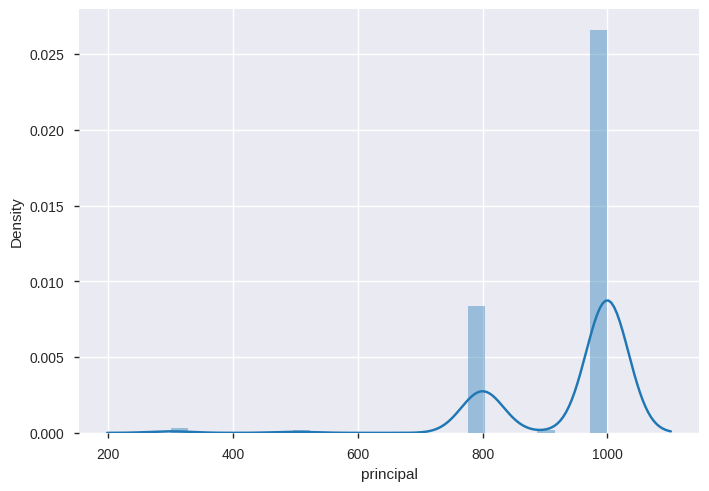

In [ ]:
# Checking for the distribution
sns.distplot( df['principal']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


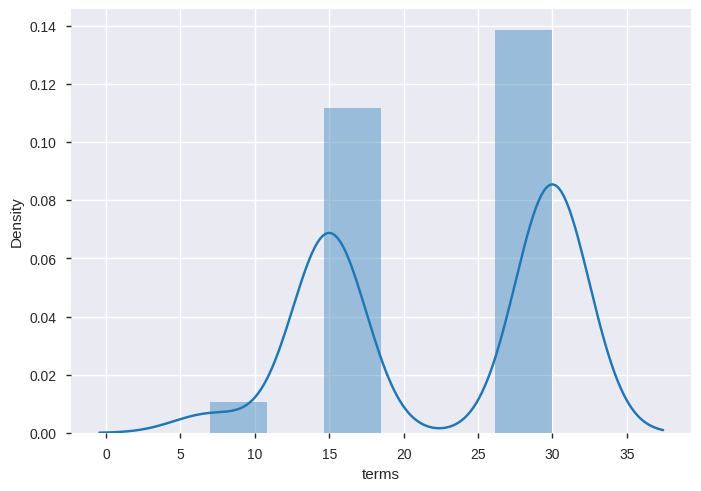

In [ ]:
sns.distplot( df['terms']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


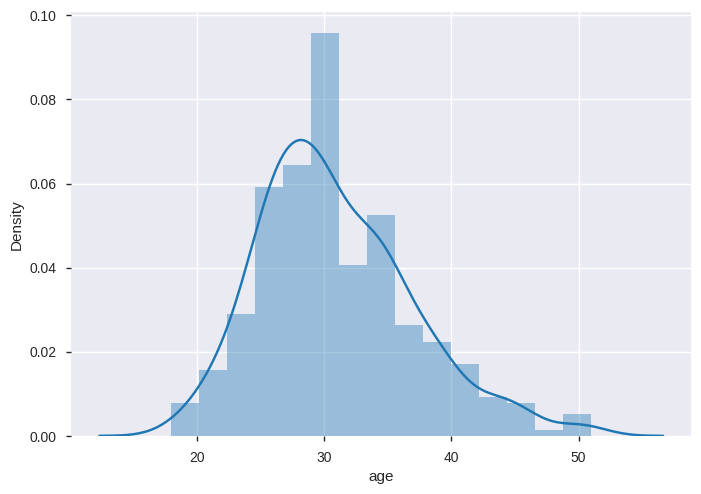

In [ ]:
sns.distplot( df['age']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


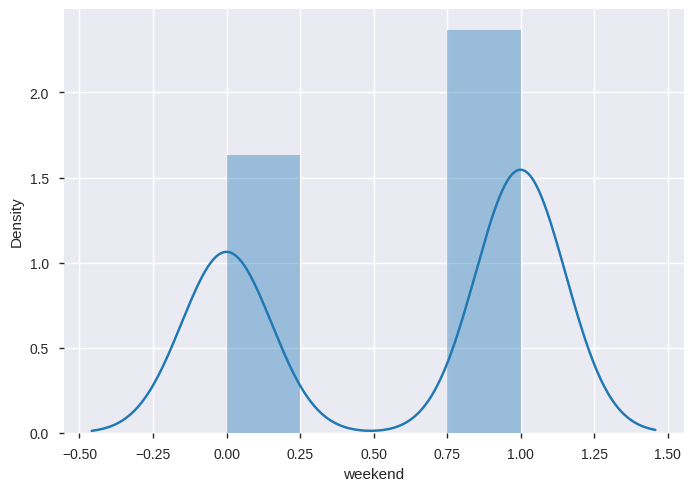

In [ ]:
sns.distplot( df['weekend']);

### **Sorting** The Data

In [ ]:
# View the dataframe's columns
df.columns

Index(['loan_status', 'principal', 'terms', 'age', 'education', 'gender',
       'weekend'],
      dtype='object')

In [ ]:
# Creating an ordered list with the columns
columns_order = ['weekend', 'gender', 'age', 'education', 'principal', 'terms', 'loan_status']

# Reorder our dataframe
df = df[columns_order]

# Viewing the dataframe after reordering the columns
df.head()

,weekend,gender,age,education,principal,terms,loan_status
0,0,male,45,High School or Below,1000,30,PAIDOFF
1,0,female,33,Bechalor,1000,30,PAIDOFF
2,0,male,27,college,1000,15,PAIDOFF
3,1,female,28,college,1000,30,PAIDOFF
4,1,male,29,college,1000,30,PAIDOFF


### Converting **categorical** variables into **numerical** ones.

In [ ]:
# Making a new dataframe for dummies
df_dummies = df.copy()

In [ ]:
# Viewing the distinct values and their corresponding count for categorical columns
from pandas.api.types import is_numeric_dtype
for col in df_dummies.columns:
    if (is_numeric_dtype(df_dummies[col]) == False):
      print(f'({col}):\n{df_dummies[col].value_counts()}\n\n')

(gender):
male      294
female     52
Name: gender, dtype: int64


(education):
High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64


(loan_status):
PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64




In [ ]:
# Replacing Categorical Classes with Numbers
df_dummies['gender'] = df_dummies['gender'].map({'male': 0, 'female': 1})
df_dummies['education'] = df_dummies['education'].map({'High School or Below': 0, 'college': 1, 'Bechalor': 2, 'Master or Above': 3})
df_dummies['loan_status'] = df_dummies['loan_status'].map({'PAIDOFF': 0, 'COLLECTION': 1})

> Gender Dummies

| Variable         | Value   |
|------------------|---------|
| male           | 0       |
| female           | 1       |

> Education Dummies

| Variable         | Value   |
|------------------|---------|
| High School or Below           | 0       |
| college           | 1       |
| Bechalor          | 2       |
| Master or Above          | 3       |

> loan_status Dummies

| Variable         | Value   |
|------------------|---------|
| PAIDOFF                  | 0       |
| Collection           | 1       |

In [ ]:
# Viewing the top 5 rows
df_dummies.head(5)

,weekend,gender,age,education,principal,terms,loan_status
0,0,0,45,0,1000,30,0
1,0,1,33,2,1000,30,0
2,0,0,27,1,1000,15,0
3,1,1,28,1,1000,30,0
4,1,0,29,1,1000,30,0



### Throughout the previous data cleansing and preprocessing, we have assured that the data are:


*  Having a proper **naming conventions**.
*  Having a relevant **data types**.
*  **Chronologically** reliable.
*  Having **valid**, **accurate**, and **consistent** values.
* **Complete**. (i.e No nulls)
*  In good **format**
*  **Unique** (i.e No duplicates)
* **Sorted**
* Having **dummies** for building ML/DeepLearning models

In [ ]:
# Brief summary statistics of both numerical and categorical columns
df_dummies.describe(include='all')

,weekend,gender,age,education,principal,terms,loan_status
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,0.592486,0.150289,30.939306,0.702312,943.641618,22.653179,0.248555
std,0.492084,0.357872,6.039418,0.706775,109.425530,7.991006,0.432801
min,0.000000,0.000000,18.000000,0.000000,300.000000,7.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,900.000000,15.000000,0.000000
50%,1.000000,0.000000,30.000000,1.000000,1000.000000,30.000000,0.000000
75%,1.000000,0.000000,35.000000,1.000000,1000.000000,30.000000,0.000000
max,1.000000,1.000000,51.000000,3.000000,1000.000000,30.000000,1.000000


### **Exporting** to CSV

In [ ]:
df_dummies.to_csv('CleanData-With-Dummies' , index = False)

## Exploratory Data Analysis (**EDA**)

> We're going to explore the data to define which variables may have predictive powers on our target variable.

> (i.e Variables may predict the loan status)

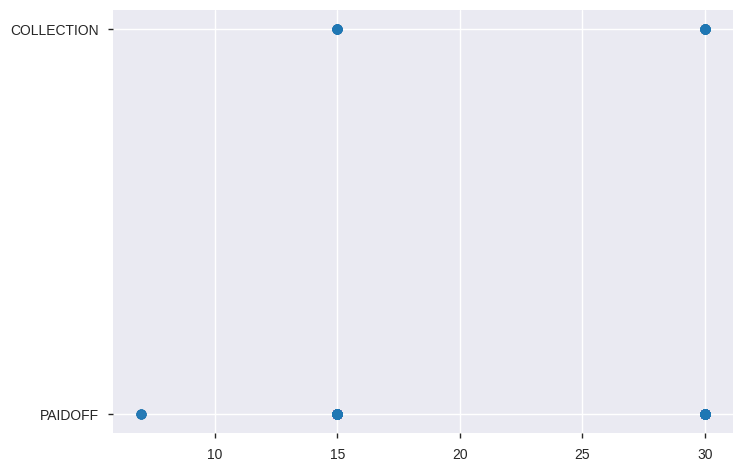

In [ ]:
# ScatterPlot
plt.scatter(df['terms'], df['loan_status'], alpha=0.2);

> The more the term is, the more the probability of not paying-off is.

> (i.e term has predictive powers)

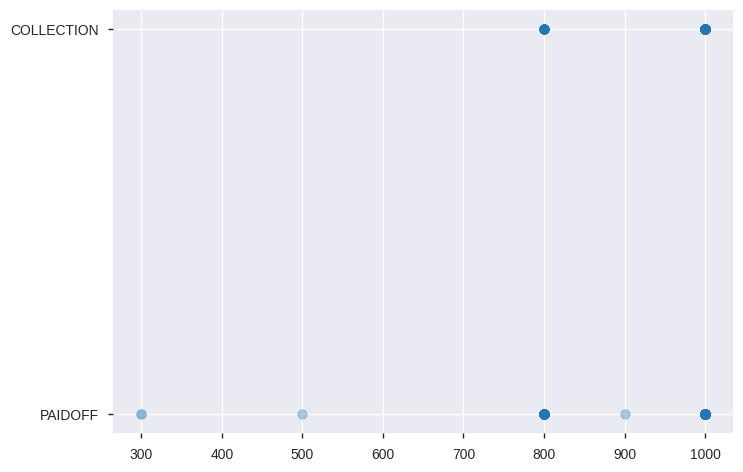

In [ ]:
# ScatterPlot
plt.scatter(df['principal'], df['loan_status'], alpha=0.2);

> The more the principal is, the more probability of not paying-off is.

> (i.e Principal amount has predictive powers)

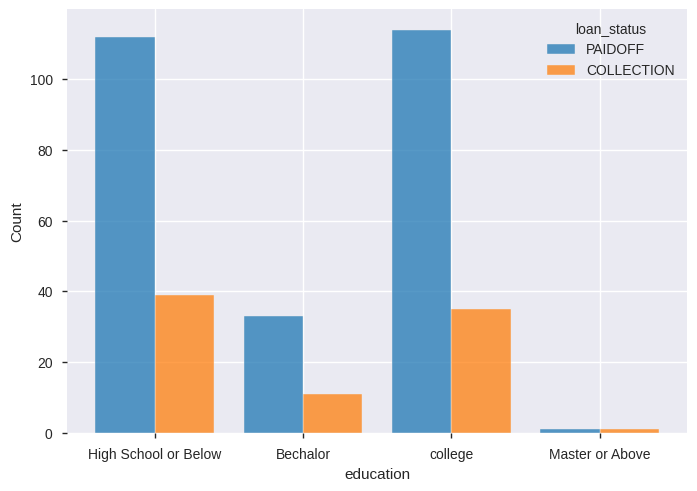

In [ ]:
# Histograms
sns.histplot(data=df, x="education", hue="loan_status", multiple="dodge", shrink=.8);

> It sounds like the more educated the person is, the more likelihood of paying-off is.

> (i.e Education has predictive powers)

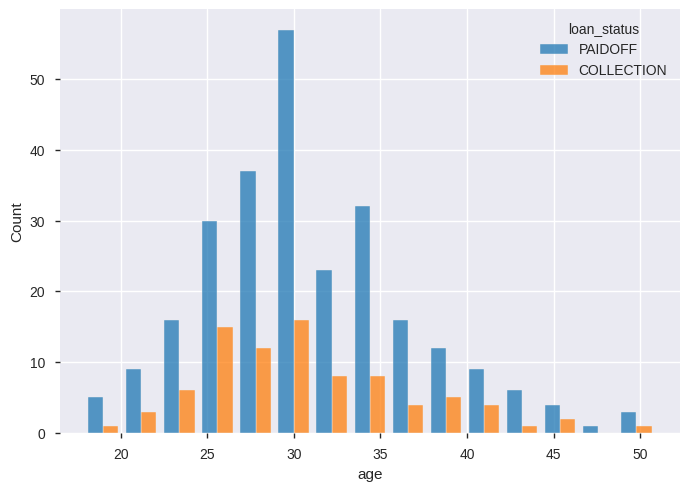

In [ ]:
# Histograms
sns.histplot(data=df, x="age", hue="loan_status", multiple="dodge", shrink=.8);

> Referencing the chart above, we notice that mid-aged people are more likely to be under collention yet.

> (i.e Age has predictive powers.)

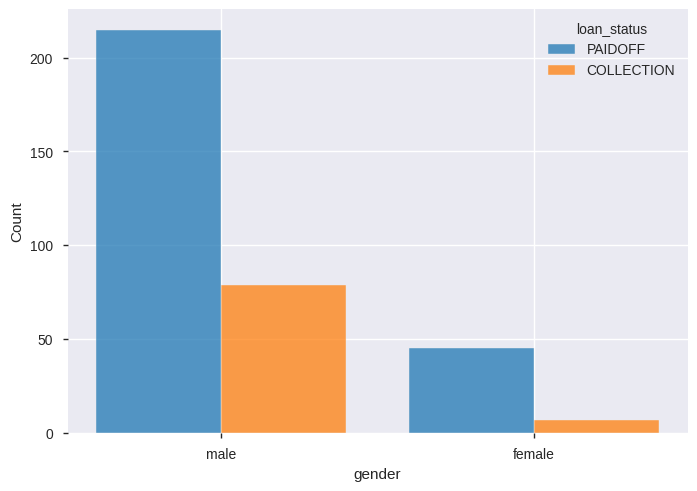

In [ ]:
# Histograms
sns.histplot(data=df, x="gender", hue="loan_status", multiple="dodge", shrink=.8);

> It sounds like males are more proojected to not paying-off than females.

> (i.e Gender has predictive powers.)

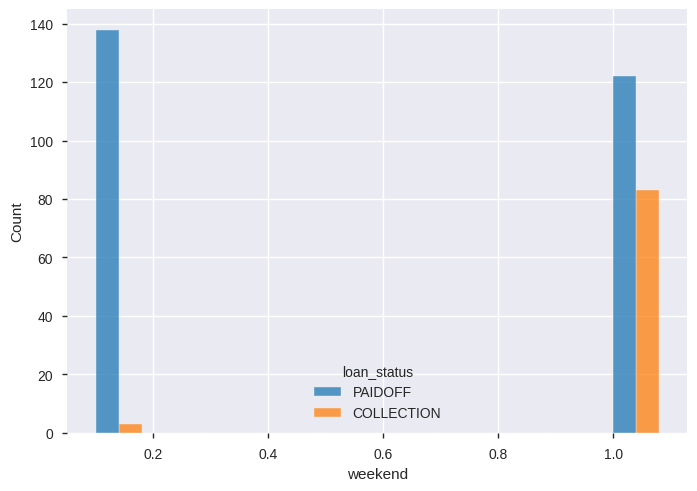

In [ ]:
# Histograms
sns.histplot(data=df, x="weekend", hue="loan_status", multiple="dodge", shrink=.8);

> It seems that the likelihood of not paying-off is higher on weekends than other days.

> (i.e weekends have predictive powers)

# **Classification** Models
*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine (SVM)
*   Logistic Regression (Probabilities of an event)

#### **Feature** Selection

In [ ]:
df_dummies.columns

Index(['weekend', 'gender', 'age', 'education', 'principal', 'terms',
       'loan_status'],
      dtype='object')

In [ ]:
# Assigning the target variable(Y)
y =  df_dummies['loan_status']
y

0      0
1      0
2      0
3      0
4      0
      ..
341    1
342    1
343    1
344    1
345    1
Name: loan_status, Length: 346, dtype: int64

In [ ]:
# Assigning the inputs(Xs)
x = df_dummies[['weekend', 'gender', 'age', 'education', 'principal', 'terms']]
x

,weekend,gender,age,education,principal,terms
0,0,0,45,0,1000,30
1,0,1,33,2,1000,30
2,0,0,27,1,1000,15
3,1,1,28,1,1000,30
4,1,0,29,1,1000,30
...,...,...,...,...,...,...
341,1,0,32,0,800,15
342,1,0,25,0,1000,30
343,0,0,39,1,800,15
344,0,0,28,1,1000,30


#### **Scaling || Standardization || Normalizing**

 - To avoid the high order magnitudes of variables (i.e put them on the same footage)
 - X ~ N(0, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled

array([[-1.20577805, -0.42056004,  2.33152555, -0.99512471,  0.51578458,
         0.92071769],
       [-1.20577805,  2.37778177,  0.34170148,  1.83872837,  0.51578458,
         0.92071769],
       [-1.20577805, -0.42056004, -0.65321055,  0.42180183,  0.51578458,
        -0.95911111],
       ...,
       [-1.20577805, -0.42056004,  1.33661351,  0.42180183, -1.31458942,
        -0.95911111],
       [-1.20577805, -0.42056004, -0.48739188,  0.42180183,  0.51578458,
         0.92071769],
       [-1.20577805, -0.42056004, -0.81902922,  0.42180183,  0.51578458,
         0.92071769]])

#### Splitting To **Train & Test**

 - To avoid model overfitting (i.e High training on a the data entirely capturing all the Noise)
 - This makes the model not generalized to be applied on an OutOfSample data.

In [ ]:
x_train = x_scaled 
y_train = y
print ('Train set:', x_train.shape,  y_train.shape)

Train set: (346, 6) (346,)


In [ ]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-06-13 01:59:09--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-06-13 01:59:10 (782 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [ ]:
DATA2 = pd.read_csv("loan_test.csv")
x_test_raw =  DATA2.copy()

> Repeating what we'done for the train dataset during cleaning and preprocessing, but this time for the testdataset

In [ ]:
# Renaming the columns to be in lowercase separated by '_' instead of spaces
x_test_raw.rename( columns= lambda x : x.strip().lower().replace(' ','_'), inplace = True);

x_test_raw.head(5)

,unnamed:_0,unnamed:_0.1,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [ ]:
# creating a list holding the columns to be dropped
cols = ['unnamed:_0', 'unnamed:_0.1', 'due_date']

# Dropping the columns
x_test_raw.drop( cols, axis=1, inplace= True )

x_test_raw.head()

,loan_status,principal,terms,effective_date,age,education,gender
0,PAIDOFF,1000,30,9/8/2016,50,Bechalor,female
1,PAIDOFF,300,7,9/9/2016,35,Master or Above,male
2,PAIDOFF,1000,30,9/10/2016,43,High School or Below,female
3,PAIDOFF,1000,30,9/10/2016,26,college,male
4,PAIDOFF,800,15,9/11/2016,29,Bechalor,male


In [ ]:
# Converting a string column into datetime 
x_test_raw['effective_date'] = pd.to_datetime( x_test_raw['effective_date'] )

# Extracting the day of the week from the date column
x_test_raw['day_of_week'] = x_test_raw['effective_date'].dt.dayofweek

# Creating a column to tell either we're in a weekend or not
x_test_raw['weekend'] = x_test_raw['day_of_week'].apply(lambda x: 1 if (x>3)  else 0)

x_test_raw.head(5)

,loan_status,principal,terms,effective_date,age,education,gender,day_of_week,weekend
0,PAIDOFF,1000,30,2016-09-08,50,Bechalor,female,3,0
1,PAIDOFF,300,7,2016-09-09,35,Master or Above,male,4,1
2,PAIDOFF,1000,30,2016-09-10,43,High School or Below,female,5,1
3,PAIDOFF,1000,30,2016-09-10,26,college,male,5,1
4,PAIDOFF,800,15,2016-09-11,29,Bechalor,male,6,1


In [ ]:
# Dropping uneeded columns
x_test_raw.drop( ['day_of_week', 'effective_date'] , axis=1, inplace= True )
x_test_raw.head(5)

,loan_status,principal,terms,age,education,gender,weekend
0,PAIDOFF,1000,30,50,Bechalor,female,0
1,PAIDOFF,300,7,35,Master or Above,male,1
2,PAIDOFF,1000,30,43,High School or Below,female,1
3,PAIDOFF,1000,30,26,college,male,1
4,PAIDOFF,800,15,29,Bechalor,male,1


In [ ]:

# Creating an ordered list with the columns
columns_order = ['weekend', 'gender', 'age', 'education', 'principal', 'terms', 'loan_status']

# Reorder our dataframe
x_test_raw = x_test_raw[columns_order]
x_test_raw.head(5)

,weekend,gender,age,education,principal,terms,loan_status
0,0,female,50,Bechalor,1000,30,PAIDOFF
1,1,male,35,Master or Above,300,7,PAIDOFF
2,1,female,43,High School or Below,1000,30,PAIDOFF
3,1,male,26,college,1000,30,PAIDOFF
4,1,male,29,Bechalor,800,15,PAIDOFF


In [ ]:
# Replacing Categorical Classes with Numbers
x_test_raw['gender'] = x_test_raw['gender'].map({'male': 0, 'female': 1})
x_test_raw['education'] = x_test_raw['education'].map({'High School or Below': 0, 'college': 1, 'Bechalor': 2, 'Master or Above': 3})
x_test_raw['loan_status'] = x_test_raw['loan_status'].map({'PAIDOFF': 0, 'COLLECTION': 1})
x_test_raw.head(5)

,weekend,gender,age,education,principal,terms,loan_status
0,0,1,50,2,1000,30,0
1,1,0,35,3,300,7,0
2,1,1,43,0,1000,30,0
3,1,0,26,1,1000,30,0
4,1,0,29,2,800,15,0


> Gender Dummies

| Variable         | Value   |
|------------------|---------|
| male           | 0       |
| female           | 1       |

> Education Dummies

| Variable         | Value   |
|------------------|---------|
| High School or Below           | 0       |
| college           | 1       |
| Bechalor          | 2       |
| Master or Above          | 3       |

> loan_status Dummies

| Variable         | Value   |
|------------------|---------|
| PAIDOFF                  | 0       |
| Collection           | 1       |

In [ ]:
y_test = x_test_raw.iloc[:,-1]
x_test = x_test_raw.iloc[:,:6]
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (346, 6) (346,)
Test set: (54, 6) (54,)


### K Nearest Neighbor(**KNN**)

> Is a supervised classification ML model

> Predicting based on the similarities among K-Nearest Neighbors

In [ ]:
# importing necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

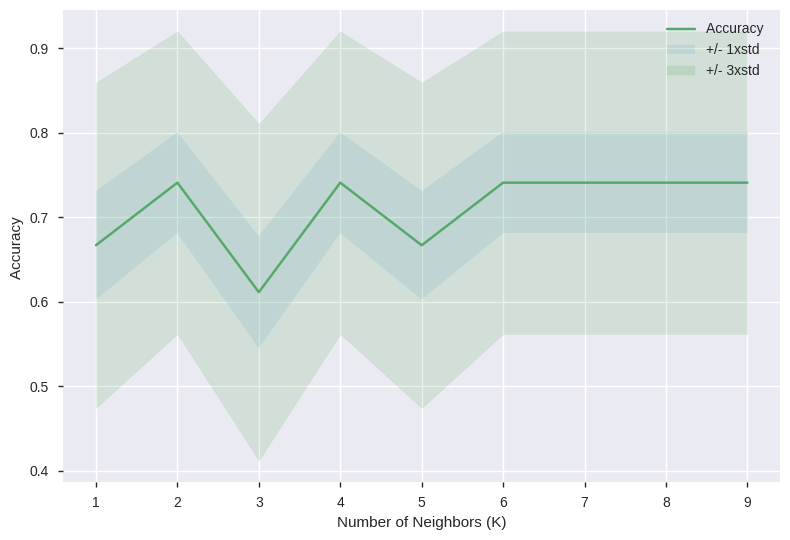


---> (( The best accuracy was with 0.7407407407407407 with k= 2  ))


In [ ]:
# assigning and initializing to-be-used variables
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
# Lopping with different no. of K-neighbors
for n in range(1,Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

# display(mean_acc)
# Plotting Accuracy vs. no of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "\n---> (( The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1, " ))")

In [ ]:
# Fitting the Model
best_n_neighbors = mean_acc.argmax()+1
neigh = KNeighborsClassifier(n_neighbors = best_n_neighbors ).fit(x_train,y_train)

# Predicting with the Model
y_hat_knn = neigh.predict(x_test)

### **Decision Tree**

 > Is a classification supervised ML model, predicting based on recursive partitioning.

 > To minimize the nodes' entropies & To maximize the information gained

In [ ]:
# importing necessary packages
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

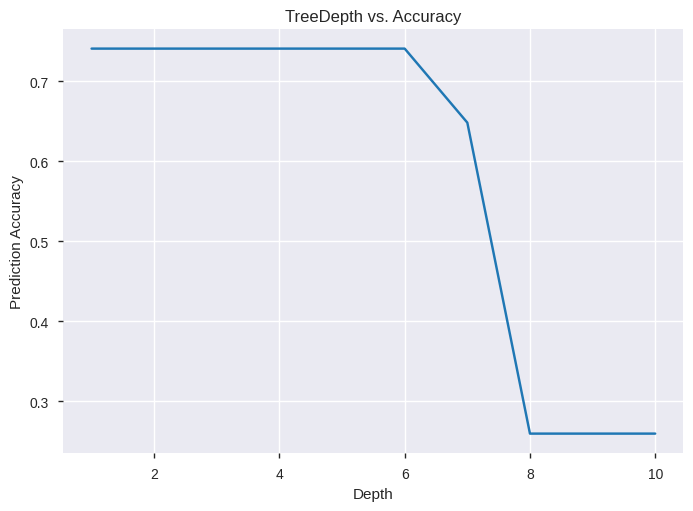

In [ ]:
# initializing to-be-used list of accuracy
accuracy = []

# Lopping with different no. of tree splits
for depth in range(1,11):
  DTree = DecisionTreeClassifier(criterion="entropy", max_depth = depth)
  DTree.fit(x_train,y_train)
  predTree = DTree.predict(x_test)
  # print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
  accuracy.append(metrics.accuracy_score(y_test, predTree))

# Plotting Accuracy vs. TreeDepth
plt.plot(np.arange(1,11),accuracy);
plt.title('TreeDepth vs. Accuracy');
plt.xlabel('Depth');
plt.ylabel('Prediction Accuracy');
# np.argmax(accuracy)+1

In [ ]:
# Fitting the Model
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = np.argmax(accuracy)+1)
DTree.fit(x_train,y_train)

# Predicting with the Model
y_hat_dtree = DTree.predict(x_test)

### Support Vector Machine (**SVM**)

> Is a classification supervised ML model.

> Predicting based on kernelling data into a higher dimensional space in a way to be linearly separable according to the categorical classes.


In [ ]:
# Fitting the Model
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
clf.fit(x_train, y_train)

# Predicting with the Model
y_hat_svm = clf.predict(x_test)

### **Logistic Regression** (Probabilities of an event)

> Logistic Regression model: is a calssification supervised ML model

> Used for binary classification (i.e To tell the probability of an event)

> Gradient descent is used to find the optimal regressors parameters

In [ ]:
# Fitting the Model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)

# P(Y=0|X) & P(Y=1|X)
y_hat_probilities = LR.predict_proba(x_test)

# Predicting with the Model
y_hat_logistic = LR.predict(x_test)

### Model **Evaluation** using Test set

In [ ]:
# importing necessary packages
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [ ]:
# Calculating Jaccard-Index
Jaccard_indices = []
KNN_Jaccard = jaccard_score(y_test, y_hat_knn, pos_label=0)
Jaccard_indices.append(KNN_Jaccard)
DT_Jaccard = jaccard_score(y_test, y_hat_dtree, pos_label=0)
Jaccard_indices.append(DT_Jaccard)
SVM_Jaccard = jaccard_score(y_test, y_hat_svm, pos_label=0)
Jaccard_indices.append(SVM_Jaccard)
LR_Jaccard = jaccard_score(y_test, y_hat_logistic, pos_label=1)
Jaccard_indices.append(LR_Jaccard)
Jaccard_indices

[0.7407407407407407,
 0.7407407407407407,
 0.7407407407407407,
 0.25925925925925924]

In [ ]:
# Calculating F1-Score
F1_scores = []
KNN_F1 = f1_score(y_test, y_hat_knn, average='weighted')
F1_scores.append(KNN_F1)
DT_F1 = f1_score(y_test, y_hat_dtree, average='weighted')
F1_scores.append(DT_F1)
SVM_F1 = f1_score(y_test, y_hat_svm, average='weighted')
F1_scores.append(SVM_F1)
LR_F1 = f1_score(y_test, y_hat_logistic, average='weighted')
F1_scores.append(LR_F1)
F1_scores

[0.6304176516942475,
 0.6304176516942475,
 0.6304176516942475,
 0.10675381263616558]

In [ ]:
# Calculating Log_loss
Logloss = log_loss(y_test, y_hat_logistic)
Logloss

25.58487110543769

In [ ]:
# Creating Accuracy DataFrame
Algorithms = ['KNN', 'DecisionTree', 'SVM', 'LogisticRegression']
Accuracy_df = pd.DataFrame( data = {'Algorithm': Algorithms,
                                    'JaccardIndex': Jaccard_indices,
                                    'F1_Score': F1_scores,
                                    'Log_loss':['NA', 'NA', 'NA', Logloss ]})
Accuracy_df

,Algorithm,JaccardIndex,F1_Score,Log_loss
0,KNN,0.740741,0.630418,NA
1,DecisionTree,0.740741,0.630418,NA
2,SVM,0.740741,0.630418,NA
3,LogisticRegression,0.259259,0.106754,25.5849


> Referecing the table above, we notice that KNN, DecisionTree and SVM models have nearly the same scores.

> **KNN**, **DecisionTree** and **SVM** predicted around **74%** of the new data properly which sounds it works a little bit well.


> So, we will use any of them for predicting new loan-statuses.